In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [248]:
path=r'C:\Users\labar\OneDrive\Desktop\DS\train.csv'
df=pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [251]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(340, 549)

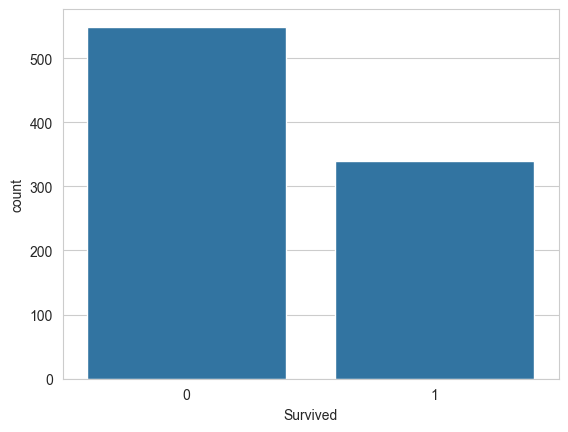

In [270]:
sns.countplot(x='Survived',data=df)
survived=0
not_survive=0
for x in df.Survived:
    if x==1:
        survived+=1
    else:
        not_survive+=1

survived,not_survive

<Axes: >

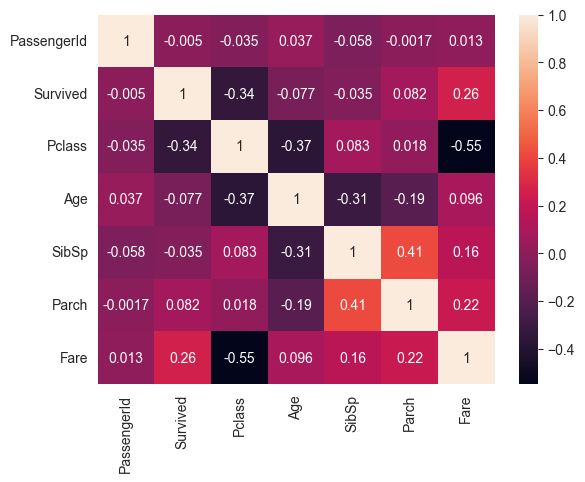

In [252]:

sns.heatmap(df.select_dtypes([int,float]).corr(),annot=True)

<Axes: xlabel='Age', ylabel='Count'>

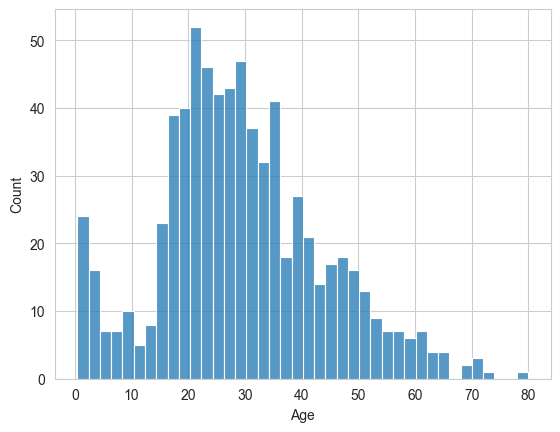

In [253]:
sns.histplot(x='Age',data=df,kde=False,bins=40)

C:\Users\labar\AppData\Local\Temp\ipykernel_8716\409733001.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


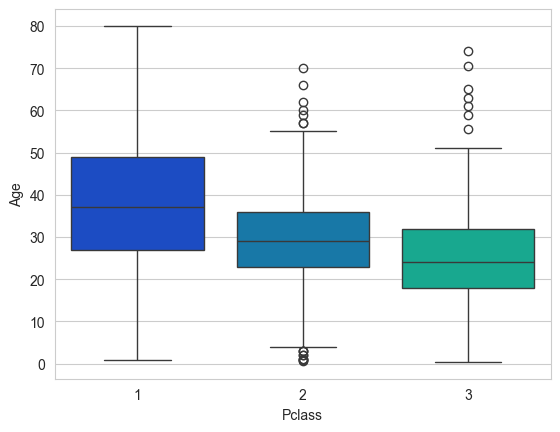

In [254]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')
plt.show()

# Imputing the Age column

In [92]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37

        elif Pclass==2:
            return 29

        else:
            return 24

    else:
        return Age
    
    

In [255]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)
df

C:\Users\labar\AppData\Local\Temp\ipykernel_8716\2339600217.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\labar\AppData\Local\Temp\ipykernel_8716\2339600217.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

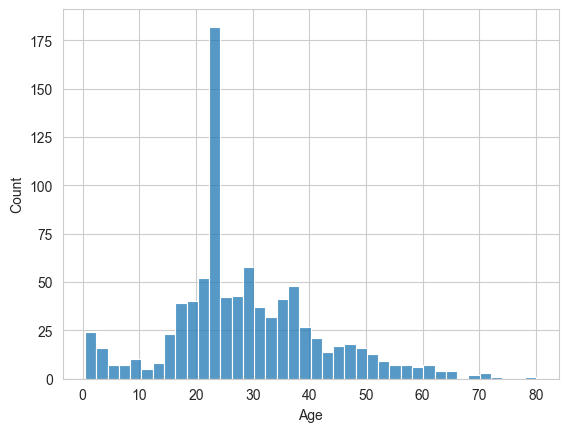

In [256]:
sns.histplot(x='Age',data=df,kde=False,bins=40)
df.isnull().sum()

In [257]:
df.drop(columns=['Cabin'],axis=1,inplace=True)

In [258]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.775,S
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.500,Q
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.500,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,24.0,0,0,312993,7.775,S


In [259]:
df.dropna(inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [260]:
embarked=pd.get_dummies(df['Embarked'],drop_first=True)
sex=pd.get_dummies(df['Sex'],drop_first=True)
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [261]:
df.drop(['PassengerId','Sex','Name','Embarked'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
0,0,3,22.0,1,0,A/5 21171,7.2500
1,1,1,38.0,1,0,PC 17599,71.2833
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,35.0,1,0,113803,53.1000
4,0,3,35.0,0,0,373450,8.0500


In [262]:
df=pd.concat([df,sex,embarked],axis=1)

In [263]:
df

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,22.0,1,0,A/5 21171,7.2500,True,False,True
1,1,1,38.0,1,0,PC 17599,71.2833,False,False,False
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,1,1,35.0,1,0,113803,53.1000,False,False,True
4,0,3,35.0,0,0,373450,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,13.0000,True,False,True
887,1,1,19.0,0,0,112053,30.0000,False,False,True
888,0,3,24.0,1,2,W./C. 6607,23.4500,False,False,True
889,1,1,26.0,0,0,111369,30.0000,True,False,False


In [ ]:
X=df.iloc[:,1:]
y=df.Survived
X

# Testing various Classification Models

In [271]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [106]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()

In [108]:
logit.fit(X_train,y_train)

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
y_pred=logit.predict(X_test)

In [125]:


import numpy as np

k=0
for i in range(len(y_test)):
    if abs(y_test[i]-y_pred[i])==0:
        k+=1

acc=k/len(y_test)*100
print(acc)


82.02247191011236


In [181]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
accuracy=accuracy_score(y_test,y_pred)
accuracy*100

confusion=confusion_matrix(y_test,y_pred)
confusion

array([[99,  8],
       [24, 47]], dtype=int64)

In [146]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',C=2.0)
svc.fit(X_train,y_train)

SVC(C=2.0, kernel='linear')

In [147]:
y_pred_svc=svc.predict(X_test)
accuracy_svc=accuracy_score(y_pred_svc,y_test)
accuracy_svc

0.7865168539325843

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=70,random_state=42)
dec_tree= DecisionTreeClassifier(random_state=42,max_leaf_nodes=15)
dec_tree.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=70, random_state=42)

In [209]:
y_pred_dec_tree=dec_tree.predict(X_test)
y_pred_rf=rf.predict(X_test)
accuracy_dec_tree=accuracy_score(y_test,y_pred_dec_tree)
accuracy_rf=accuracy_score(y_test,y_pred_rf)
accuracy_rf
precision_rf=precision_score(y_test,y_pred_rf)
accuracy_dec_tree,accuracy_rf

(0.8539325842696629, 0.8314606741573034)

In [222]:
df2=pd.read_csv('final_testing2.csv')
df2

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,True,False,True
414,1,39.0,0,0,108.9000,False,False,False
415,3,38.5,0,0,7.2500,True,False,True
416,3,24.0,0,0,8.0500,True,False,True


In [223]:
X_final=df2.iloc[:,:]
y_pred_dec_tree_final=dec_tree.predict(X_final)
y_pred_dec_tree_final

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [272]:
pas=[]
for i in range (418):
    pas.append(i+892)


In [229]:
df3=pd.DataFrame({'PassengerID':pas,'Survived':y_pred_dec_tree_final})
excel_file_path = r'C:\Users\labar\OneDrive\Desktop\DS\data.xlsx'
df3.to_excel(excel_file_path, index=False)
